In [1]:
 %matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs) 

Text(0,0.5,'Magnitud')

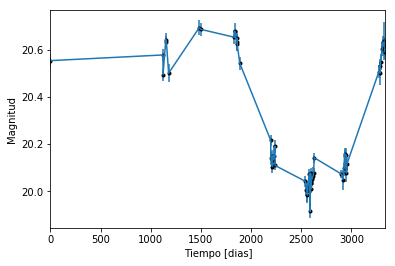

In [2]:
data = np.genfromtxt('LC_15195_G.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

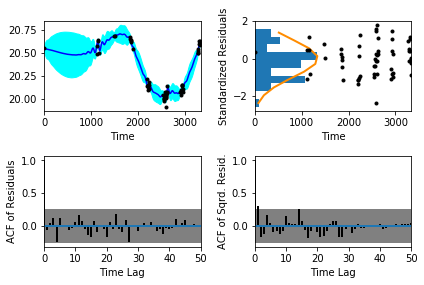

In [5]:
sample.assess_fit()

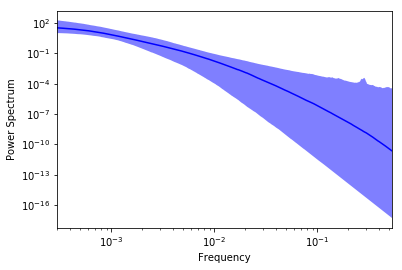

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

Text(0.000374595,0.0716492,'Medida del nivel de ruido')

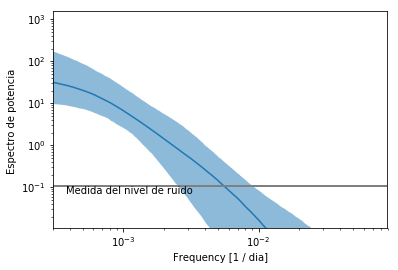

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))

Text(0.5,1,'Prediccion , valor esperado ')

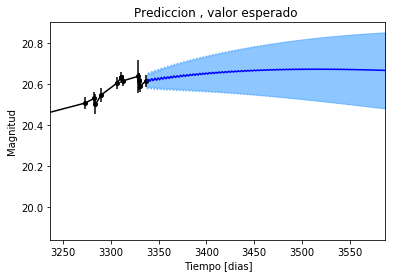

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado ')

Text(0.5,1,'Prediccion, Caminos simulados')

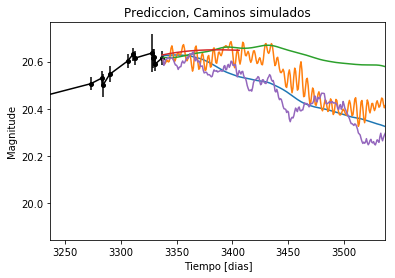

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitude')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


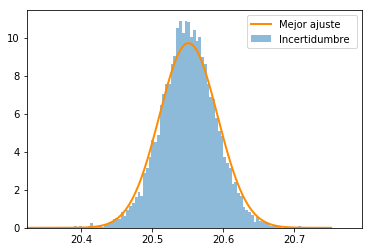

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')

Text(0.5,1,'Interpolacion, camino simulado')

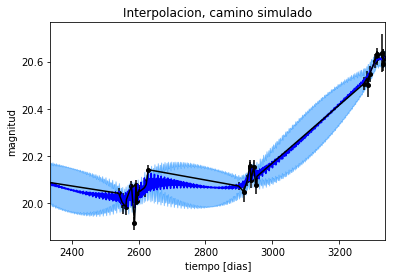

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado')

Text(0.5,1,'Interpolacion, camino simulado')

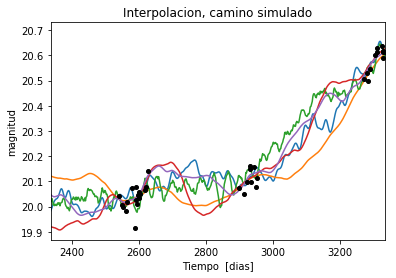

In [13]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

Plotting parameter summary


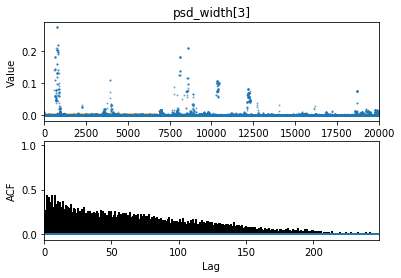

In [15]:
sample.plot_parameter('psd_width', 3, doShow=True)

In [16]:
centroid_samples = sample.get_samples('psd_width')
centroid_samples.shape

(20000, 4)

In [17]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 303.292784847
Median: 0.00934865330278
Standard deviation: 0.190209540015
68% credibility interval: [ 0.00091304  0.18675153]
95% credibility interval: [  3.49790034e-04   7.30963699e-01]
99% credibility interval: [  3.09878976e-04   9.86643155e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 718.094707486
Median: 0.00230303004571
Standard deviation: 0.0622169266171
68% credibility interval: [ 0.00049134  0.02272829]
95% credibility interval: [ 0.00032134  0.19561686]
99% credibility interval: [  3.05471198e-04   4.33248526e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 322.36262656
Median: 0.0145284110417
Standard 

In [18]:
centroid_samples = sample.get_samples('psd_centroid')
centroid_samples.shape

(20000, 4)

In [19]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 322.937047507
Median: 0.0336244513645
Standard deviation: 0.273953511762
68% credibility interval: [ 0.          0.48539614]
95% credibility interval: [ 0.          0.92836341]
99% credibility interval: [ 0.          1.03332405]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 322.937047507
Median: 0.0336244513645
Standard deviation: 0.273953511762
68% credibility interval: [ 0.          0.48539614]
95% credibility interval: [ 0.          0.92836341]
99% credibility interval: [ 0.          1.03332405]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 832.571297082
Median: 0.0
Standard deviation: 0.00031538497897
68% cre

Plotting parameter summary


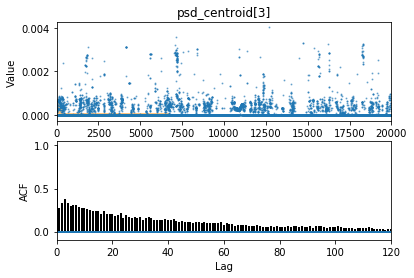

In [20]:
sample.plot_parameter('psd_centroid', 3, doShow=True)

In [21]:
centroid_samples = sample.get_samples('logpost')
centroid_samples.shape

(20000, 1)

In [22]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 237.042667473
Median: 110.10410912
Standard deviation: 1.89307177302
68% credibility interval: [ 108.21866793  111.69465688]
95% credibility interval: [ 105.8851942   113.79686825]
99% credibility interval: [ 103.93832234  114.47975097]


In [23]:
centroid_samples = sample.get_samples('ar_coefs')
centroid_samples.shape

(20000, 5)

In [24]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 447.113038545
Median: 0.421101089365
Standard deviation: 2.09689866703
68% credibility interval: [ 0.04488813  3.36127964]
95% credibility interval: [ 0.01317054  7.09532073]
99% credibility interval: [  8.99471338e-03   1.07508581e+01]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 1376.45821016
Median: 0.878101452088
Standard deviation: 9.49427554803
68% credibility interval: [  0.02394427  11.43980345]
95% credibility interval: [  1

Plotting parameter summary


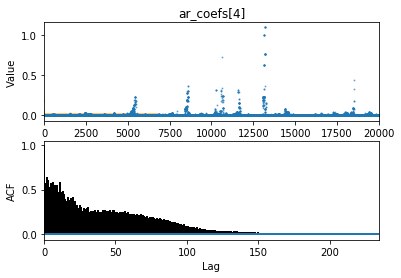

In [25]:
sample.plot_parameter('ar_coefs', 4, doShow=True)

In [26]:
 centroid_samples = sample.get_samples('ma_coefs')
centroid_samples.shape

(20000, 2)

In [27]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 10009.5147467
Median: 1.52257714615e-21
Standard deviation: 1.92670243944e+150
68% credibility interval: [  4.44722258e-52   9.19108707e-05]
95% credibility interval: [  1.75375468e-107   8.58684081e+053]
99% credibility interval: [  1.23647400e-127   1.62543483e+134]


In [28]:
centroid_samples = sample.get_samples('mu')
centroid_samples.shape

(20000, 1)

In [29]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 1683.48027052
Median: 20.4472107792
Standard deviation: 0.140158333378
68% credibility interval: [ 20.32945353  20.57515493]
95% credibility interval: [ 20.18040614  20.73872532]
99% credibility interval: [ 20.03231054  20.90890086]


Plotting parameter summary


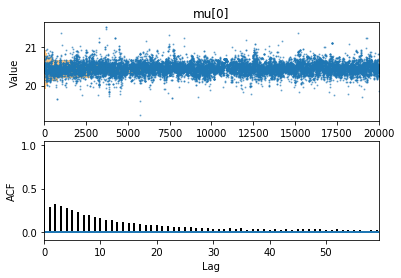

In [30]:
sample.plot_parameter('mu', 0, doShow=True)

In [31]:
centroid_samples = sample.get_samples('psd_centroid')
centroid_samples.shape

(20000, 4)

In [32]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 322.937047507
Median: 0.0336244513645
Standard deviation: 0.273953511762
68% credibility interval: [ 0.          0.48539614]
95% credibility interval: [ 0.          0.92836341]
99% credibility interval: [ 0.          1.03332405]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 322.937047507
Median: 0.0336244513645
Standard deviation: 0.273953511762
68% credibility interval: [ 0.          0.48539614]
95% credibility interval: [ 0.          0.92836341]
99% credibility interval: [ 0.          1.03332405]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 832.571297082
Median: 0.0
Standard deviation: 0.00031538497897
68% cre

Plotting parameter summary


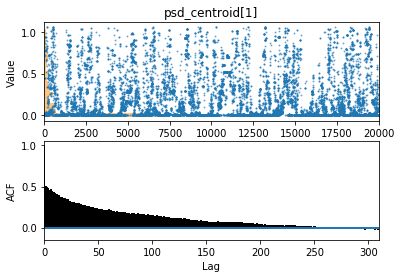

In [33]:
sample.plot_parameter('psd_centroid', 1, doShow=True)

In [34]:
centroid_samples = sample.get_samples('loglik')
centroid_samples.shape

(20000, 1)

In [35]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 237.042667473
Median: 110.10410912
Standard deviation: 1.89307177302
68% credibility interval: [ 108.21866793  111.69465688]
95% credibility interval: [ 105.8851942   113.79686825]
99% credibility interval: [ 103.93832234  114.47975097]


Plotting parameter summary


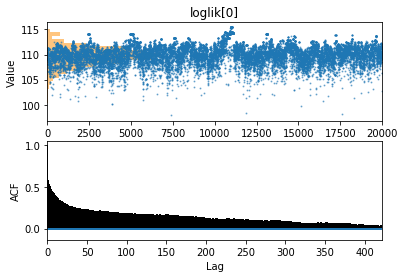

In [36]:
sample.plot_parameter('loglik', 0, doShow=True)

In [37]:
centroid_samples = sample.get_samples('var')
centroid_samples.shape

(20000, 1)

In [38]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 834.509488786
Median: 0.0601730530567
Standard deviation: 0.0694616552954
68% credibility interval: [ 0.03757652  0.11388918]
95% credibility interval: [ 0.02558472  0.26099743]
99% credibility interval: [ 0.02086369  0.46425001]


Plotting parameter summary


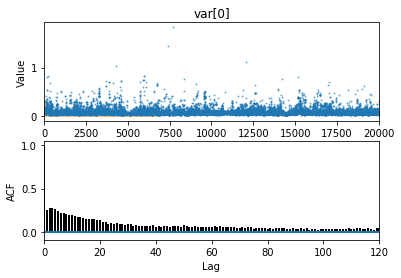

In [39]:
sample.plot_parameter('var', 0, doShow=True)

In [40]:
centroid_samples = sample.get_samples('measerr_scale')
centroid_samples.shape

(20000, 1)

In [41]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 634.615846933
Median: 1.32911337794
Standard deviation: 0.256954912679
68% credibility interval: [ 1.0631964   1.59463049]
95% credibility interval: [ 0.85831894  1.85474119]
99% credibility interval: [ 0.76332978  1.95241887]


Plotting parameter summary


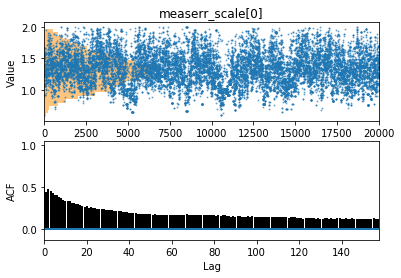

In [42]:
sample.plot_parameter('measerr_scale', 0, doShow=True)

In [43]:
centroid_samples = sample.get_samples('sigma')
centroid_samples.shape

(20000, 1)

In [44]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 355.633432821
Median: 0.00046772590522
Standard deviation: 0.160998976339
68% credibility interval: [  4.75719985e-06   1.34795985e-02]
95% credibility interval: [  1.40809049e-58   2.11031293e-01]
99% credibility interval: [  4.44495558e-140   1.21423217e+000]


Plotting parameter summary


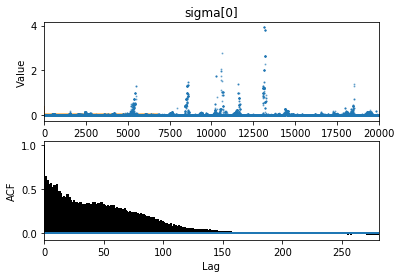

In [45]:
sample.plot_parameter('sigma', 0, doShow=True)

In [46]:
centroid_samples = sample.get_samples('ar_roots')
centroid_samples.shape

(20000, 4)

In [47]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 303.292784847
Median: (-0.0587393210739-0.17869298221j)
Standard deviation: 2.09551714783
68% credibility interval: [-1.17339444-6.41936827j -0.00573679-3.29249116j]
95% credibility interval: [ -4.59278037e+00+0.j         -2.19779560e-03-1.5316146j]
99% credibility interval: [ -6.19926177e+00+0.j          -1.94702703e-03-0.51465795j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 718.094707486
Median: (-0.0144703645452+0.115161069576j)
Standard deviation: 1.76513309749
68% credibility interval: [-0.14280608+0.34928773j -0.00308720+1.07266442j]
95% credibility interval: [-1.22909695+4.07729823j -0.00201904+1.16397902j]
99% credibility interval: [ -2.72218077e+00+5.27547332j  -1.91933214e-03+0.j        ]
Posterior summa